<a href="https://colab.research.google.com/github/kameda-yoshinari/DataAlgo-T/blob/master/DataAlgo_T(008)_ShortestPath1N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2. 1-N Shortest Path Problem

Learn the algorithm to find the shortest path starting from a certain vetex to any vertices in the given graph. It is called 1 to N shortest path problem.

**Reminder**  
On github, rendering might not be in good shape.  
To see the expected layout, open this page in Google Colaboratory.
To run one specific code cell in colab, click the icon on the left part or just type Ctrl + Enter.  

# Preparation

Connect the Jupyter environment and invoke a runtime. 
Mount your Google Drive by the procedure below.  
Change directory to the mounted point and make it as the working folder.  
By then, files are preserved even after you terminate the runtime environment.

In [ ]:
!echo "Mounting your Google Drive"
from google.colab import drive 
drive.mount('/content/drive')

In [ ]:
!echo "Make a working folder and chnage directory to it"
%cd /content/drive/My\ Drive
%mkdir -p DataAlgo-T/008
%cd       DataAlgo-T/008
!ls

Graphs should be weighted and the weights should be positive.
Graphs may be directed for the shortest path problem.

We take up Graph G6 as an example in this section.  
8 vertices, undirected, no cycles. Weights are positive.  
Graph G7 and G8 are also available. Graph G7 is a directed gpaph.    
You are encouraged to draw G7 and G8 on your notebook (as the human brain can visually understand graphs very faster).  

Note that no edge between two vertices is express by NC.  
NC is ideally infinite.
Unfortunatelly, in C language, there is no good way of expressing infinity, so we use a pretty good large number as NC.



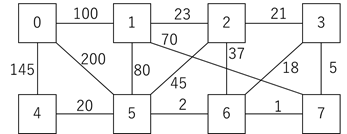

In [ ]:
%%writefile graph6.h
// 8 nodes, undirected, positive weight.
// NC means no edges.
// NC will be treated as "inifinity" on searching the shortest path. 
#define N 8
#define NC 9999 // this big value means both no path and infinity 
int edge[N][N] = {
//     0   1   2   3   4   5   6   7
	{ NC,100, NC, NC,145,200, NC, NC}, // 0
	{100, NC, 23, NC, NC, 80, NC, 70}, // 1
	{ NC, 23, NC, 21, NC, 45, 37, NC}, // 2
	{ NC, NC, 21, NC, NC, NC, 18,  5}, // 3
	{145, NC, NC, NC, NC, 20, NC, NC}, // 4
	{200, 80, 45, NC, 20, NC,  2, NC}, // 5
	{ NC, NC, 37, 18, NC,  2, NC,  1}, // 6
	{ NC, 70, NC,  5, NC, NC,  1, NC}  // 7
};

In [ ]:
%%writefile graph7.h
// 4 nodes, directed, positive weight.
// NC means no edges.
// NC will be treated as "inifinity" on searching the shortest path. 
#define N 4
#define NC 9999 // this big value means no path
int edge[N][N] = {
//     0   1   2   3
	{ NC, 10, NC, 40}, // 0
	{ NC, NC, NC, 20}, // 1
	{ NC, NC, NC, NC}, // 2
	{ NC, NC, NC, NC}, // 3
};

In [ ]:
%%writefile graph8.h
// 12 nodes, undirected, positive weight.
// NC means no edges.
// NC will be treated as "inifinity" on searching the shortest path. 
#define N 12
#define NC 9999 // this big value means no path
int edge[N][N] = {
    { 0, 4,NC,NC, 3,NC,NC,NC,NC,NC,NC,NC},
    { 4, 0, 1,NC,NC,NC, 2,NC,NC,NC,NC,NC},
    {NC, 1, 0, 1,NC,NC,NC, 2,NC,NC,NC,NC},
    {NC,NC, 1, 0,NC,NC,NC,NC,NC,NC,NC,NC},
    { 3,NC,NC,NC, 0, 1,NC,NC, 1,NC,NC,NC},
    {NC,NC,NC,NC, 1, 0, 2,NC,NC, 2, 3,NC},
    {NC, 2,NC,NC,NC, 2, 0,NC,NC,NC, 3,NC},
    {NC,NC, 2,NC,NC,NC,NC, 0,NC,NC,NC,NC},
    {NC,NC,NC,NC, 1,NC,NC,NC, 0,NC,NC,NC},
    {NC,NC,NC,NC,NC, 2,NC,NC,NC, 0,NC,NC},
    {NC,NC,NC,NC,NC, 3, 3,NC,NC,NC, 0, 1},
    {NC,NC,NC,NC,NC,NC,NC,NC,NC,NC, 1, 0}
};

# Dijkstra's Algorithm

**Explanation**

Ther shortest path problem in general is to find a path of minimum length for given two vertices in a graph. 
It means a vertex should not appear twice on the path.

When there is no path between the two vertices, the weight of the shortest path for these vertices is treated as infinite.  

Up to now, the computation cost to find the shortest path between two given vertices and the computation cost to find the shortest path from a given vertex to any vertices in the graph are considered to be same in big-O notation.

**Dijkstra's Algorithm**

We learn dijkstra's algorithm to find the shortest path that starts from a given vertex.

Both the minimum and the shortest are same meaning in this situation.  
So we use the word minimum to describe the algorithm.

In the dijkstra's algorithm, any vertices are marked as visited or unvisited. In the begining, all the vertices belong to the unvisited set. The process stops if no vertices are left in the unvisited set.

1. Distance to the starting vertex is set to zero. Distance to the other vertices are set to infinity.
2. Let all the vertices belong to the unvisited set. 
3. Pick up a vertex with the smallerst value in the unvisited set. Mark it as the current vertex.
4. Remove the current vertex from the unvisited set. (The current vertex is treated as visited).
5. For all the univisited vertices next to the current vertex, add the their tentative distance and the weight of the edge to the current vertex. If the value is smaller than the tentative distance of the current vertex, replace it with the new value.
6. Repeat the step 3,4, and 5 until no vertices are left in the unvisited set.
7. The tentative distances are the answers.

To follow the algorithm, the diagram below for Graph G6 with starting from Vertex 0 might help you.

The three successive diagrams indicate the step 3,4, and 5. The figure(s) in the square indicates its tentative distance. On step 4, upper figure is the old distance and the lower one is the new value calculated at step 4.


**Implementation**

We need to handle set operations in the algorithm. However, C language does not have built-in set operation functions. Therefore, we need to write the codes for set operations.

**Remarks**

In mathematics, infinity + finite value is infinity. However, in C language, infinity cannot be expressed as numerical value. So we need to be careful when we have to write the code of infinity + finite value.

We plan to implement infinity as a good very big number in C language implementation.

FYI, Dijkstra's algorithm is classified as greedy algorithm. And it is a special case of greedy algorithms because it gurarantees the desired solution can be obtained (usually you cannot reach to the desired solution when you follow greedy algorithms).




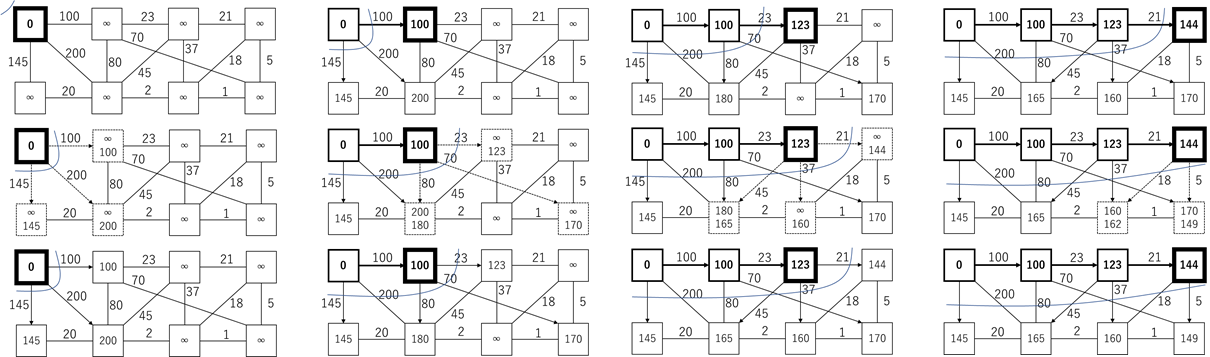

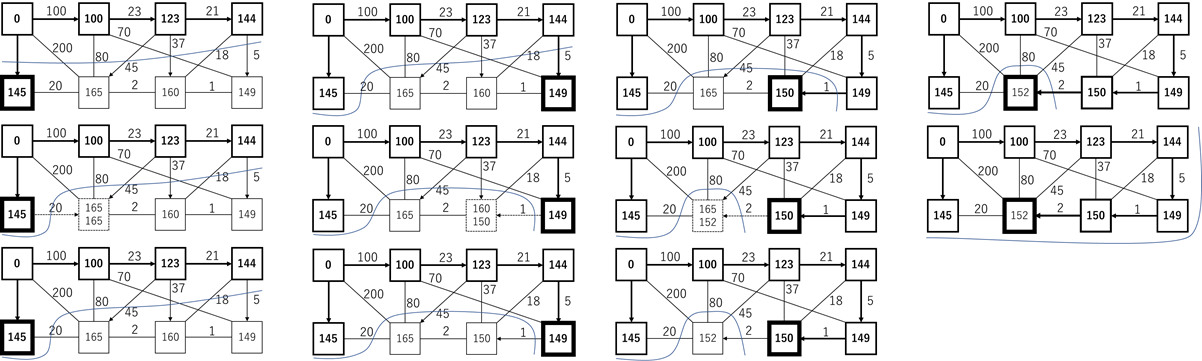

# C Program of Dijkstra's algorithm

**Purpose**

Develop the C program to find minimum weight paths to all the vertices in the given graph. Starting vertex is specified at the begining.

**Explanation**

Implementation of the algorithm is rather straightforward.

**Program**

Prepare set operation functions in another source file, and associated header file is also prepared.

1. SetLib_E.h ... prototypes of set operation funtions.
2. SetLib_E.c ... set opetation functions.
3. shortest-dijkstra_J.c ... main part of Dijkstra's algorithm.

**Remarks**

Watch your eyes oon any situations where we have to handle infinity.  
Be sure not to cause unexpected results by treating infinity as NC (a very large number yet within C language range). 

In [ ]:
%%writefile SetLib_E.h
// Set management
// kameda[at]ccs.tsukuba.ac.jp, 2020.

// This library can handle only one set.
// The elements should be non-negative integer.

// Initialization of set
// Augment: number of elements
// Return : pointer to the arrey on success, NULL on failure
int *initset(int );

// Add to the set
// Add the element (non-negagive integer) to the set
// Augment: integer to join the set
// Return : specified integer on success, negative value on failure
int addelement(int );

// Delete from the set
// Delete the element (non-negagive integer) in the set
// Augment: integer to delete from the set
// Return : specified integer on success, negative value on failure
int deleteelement(int );

// Check if the element is in the set or not
// Augment: integer to check as an element
// Return : specified integer on success, negative value on failure
int checkelement(int );

// Pass the list of elements
// Augment: pointer to the array to fill, and the length of the array
// Return : number of elements filled on success, negative value on failure
int obtainelementlist(int *, int );

// Show the status of the set
int showset(void);



In [ ]:
%%writefile SetLib_E.c
// Set management
// kameda[at]ccs.tsukuba.ac.jp, 2020.
#include <stdio.h> // printf()
#include <stdlib.h> // calloc()
#include "SetLib_J.h" // Prototype check

int *setU = NULL;  // memory are of the setU
int setsize = 0; // size of the setU array

// Initialization of set
// Augment: number of elements
// Return : pointer to the arrey on success, NULL on failure
int *initset(int n) {
    if (setU != NULL) {
		printf("[Error] Already inizialized with %d elements\n", setsize);
        return NULL;        
    }
	setU = calloc(n, sizeof(*setU));
	if (setU == NULL) {
		printf("[Error] Cannot obtain set memory for %d elements\n", n);
        return NULL;
	}
	setsize = n;
	return setU;
}

// Add to the set
// Add the element (non-negagive integer) to the set
// Augment: integer to join the set
// Return : specified integer on success, negative value on failure
int addelement(int v) {
    if (setU == NULL) {
        printf("[Error] Set is not ready.\n");
        return -1;
    } else if (v < 0 || v >= setsize) {
        printf("Error: invalid number %d (valid: 0 - %d)\n", v, setsize - 1);
        return -2;
    }
    setU[v] = 1;
    return v;
}

// Delete from the set
// Delete the element (non-negagive integer) in the set
// Augment: integer to delete from the set
// Return : specified integer on success, negative value on failure
int deleteelement(int v) {
    if (setU == NULL) {
        printf("[Error] Set is not ready.\n");
        return -1;
    } else if (v < 0 || v >= setsize) {
        printf("Error: invalid number %d (valid: 0 - %d)\n", v, setsize - 1);
        return -2;
    }
    setU[v] = 0;
    return v;
}

// Check if the element is in the set or not
// Augment: integer to check as an element
// Return : specified integer on success, negative value on failure
int checkelement(int v) {
    if (setU == NULL) {
        printf("[Error] Set is not ready.\n");
        return -1;
    } else if (v < 0 || v >= setsize) {
        printf("Error: invalid number %d (valid: 0 - %d)\n", v, setsize - 1);
        return -2;
    }

    if (setU[v] == 0)
        return -1;
    return v;
};

// Pass the list of elements
// Augment: pointer to the array to fill, and the length of the array
// Return : number of elements filled on success, negative value on failure
int obtainelementlist(int *array, int n) {
    int t; // number of elements
    int i, j;

    if (setU == NULL) {
        printf("[Error] Set is not ready.\n");
        return -1;
    }

    for (i = 0, t = 0; i < setsize; i++) {
        if (setU[i] != 0)
            t++;
    }

    if (n < t) {
        printf("[Error] Array (for %d elements) is shorter than the current %d elements.\n", n, t);
        return -2;
    }

    for (i = 0, j = 0; i < setsize; i++) {
        if (setU[i] != 0) {
            array[j] = i;
            j++;
        }
    }
 
    return t;
}

// Show the status of the set
int showset(void) {
    int t; // number of elements
    int i;

    if (setU == NULL) {
        printf("[Error] Set is not ready.\n");
        return -1;
    }

    printf("setsize = %d\n", setsize);
    printf("   set : ");
    for (i = 0, t = 0; i < setsize; i++) {
        if (setU[i] != 0) {
            printf("%d ", i);
            t++;
        }
    }
    printf("\n");
    printf("  %d elements.\n", t);

    return t;
}


In [ ]:
!gcc -Wall -c SetLib_E.c

In [ ]:
%%writefile shortest-dijkstra_E.c
// Shortest path by Dijkstra
// kameda[at]ccs.tsukuba.ac.jp, 2020.
#include <stdio.h> // printf()
#include <stdlib.h> // atoi()
#include "SetLib_E.h"
#include "graph6.h"

// Structured variable for vertex
typedef struct {
	int cost; // tentative distance.
	int from; // The source (adjacent) vertex. It is the lart part of the shortest path to this vertex.
} CostFrom;

CostFrom vertexinfo[N]; // Working memory for all the vertices

// Show the progress status
void print_vertex_status(char *show_str, int show_v){
	int i;
	
	printf("%s at %d:", show_str, show_v);
	printf(" cost(");
	for (i = 0; i < N; i++)
 		if (vertexinfo[i].cost == NC) 
   			printf("--- ");
		else
			printf("%3d ", vertexinfo[i].cost);
	printf(") from(");
	for (i = 0; i < N; i++)
 		printf("%2d ", vertexinfo[i].from);
	printf(")\n");

	showset();
	return ;
}

// Mainbody of Dijkstra's algorithm
// Augment: Starting vertex number
void find_shortest_dijkstra(int StartVertex){
	int v; // Vertex number
	int i;
	int restelements = 0; // number of elements in the unvisited set
	int restS[N]; // the unvisited set
	int min_vertex; // tentative candidate of the minimum vertex in the unvisited set (a.k.a. "current" vertex)
	int min_cost;   // tentative value of the min_vertex

	// Initialize the Set library.
	if (initset(N) == NULL) {
		  printf("Unexpected error occured. Force exiting...\n");
		  return;
	}

	// Add the vertices except the starting vertex to the unvisited set
	printf("Dijkstra: Prepare a set for %d elements.\n", N);
	for (v = 0; v < N; v++) {
		addelement(v);
		restelements++;
	}

	// Initialization
	printf("Dijkstra: Initialization.\n");
	for (v = 0; v < N; v++) {
		if (v == StartVertex){
			vertexinfo[v].cost = 0;
			vertexinfo[v].from = StartVertex;
		} else {
			vertexinfo[v].cost = NC;  
			vertexinfo[v].from = -1; // No corresponding vertex	  
		}
	}

	// Main loop
	print_vertex_status("Start", 0);
	while (restelements > 0) {
		  
	  	print_vertex_status("Loop ", restelements);

		// Obtain the unvisited set
		obtainelementlist(restS, N);
		
		// Find the vertex which becomes "current" in the unvisited set.
		min_vertex = restS[0]; 
		min_cost = vertexinfo[min_vertex].cost; 
		for (i = 1; i < restelements; i++) {
			v = restS[i];
			if (vertexinfo[v].cost < min_cost) {
				min_vertex = v;
				min_cost = vertexinfo[v].cost;
			}
		}
		printf("Minimum distance in the unvisited set is %d at Vertex %d\n", min_cost, min_vertex);

		// Remove the min_vertex from the unvisited set
		deleteelement(min_vertex);
		restelements--;

		// Update the tentative distance values of unvisited and next vertex to the min_vertex
		for (v = 0; v < N; v++) {
			if (checkelement(v)) {
				if (vertexinfo[min_vertex].cost + edge[min_vertex][v] < vertexinfo[v].cost) {
					vertexinfo[v].cost = vertexinfo[min_vertex].cost + edge[min_vertex][v];
					vertexinfo[v].from = min_vertex;
				}
			}
		}
	}

	// Show the result
	for (v = 0; v < N; v++) {
		printf("To %2d : ", v);
		if (v == StartVertex) {
			printf("----");
		} else if (vertexinfo[v].cost == NC) {
			printf("No path");
		} else {
			int s;
			printf("cost %3d : ", vertexinfo[v].cost);
			for (s = v; s != StartVertex; s = vertexinfo[s].from)
				printf("%2d <- ", s);
			printf("%2d", StartVertex);
		}
		printf("\n");
	}
}

// Main function
int main(int argc, char *argv[]){
    int startvertex = 0;
    if (argc == 1) {
        printf("Start vertex not specified, so set No.0 as start.\n");
        startvertex = 0;
    } else if (argc == 2) {
        startvertex = atoi(argv[1]);
        if (startvertex < 0 || startvertex >= N) {
            printf("Illegal ID specified, so quit.\n");
            return -1;
        }
    }

	find_shortest_dijkstra(startvertex); // Call dijkstra with the starting vertex ID

	return 0;
}


Compile it and check no errors.

In [ ]:
!gcc -Wall -c shortest-dijkstra_E.c

In [ ]:
!gcc -Wall -o shortest-dijkstra_E shortest-dijkstra_E.o SetLib_E.o

Run it.

In [ ]:
!./shortest-dijkstra_E 0

# Problems

1. Vertex list of the shortest path  
shortest-dijkstra_E.c program includes a trick to show the shortest paths. Point out the corresponding part of the trick and explain why it can show the vertex list.

2. Computation amount  
Discuss the computation amount of time and space of shortest-dijkstra_E.c program.

3. Edges with the weight zero  
What happens if there are edges whose weight are zero?

4. Error handling  
On using the functions from SetLib, shortest-dijkstra_E.c program traps them only one point. Find out where it is. Also list up other points to trap errors on using SetLib functions.

5. NC  
In the programs, NC is set to faily a magic value. Discuss the conditions that NC should satisfy and check the current NC meets the conditions.



#**Course Info**

https://github.com/kameda-yoshinari/DataAlgo-T  
Course: Data structure and algorithm  
Department of Engineering Systems, University of Tsukuba,Japan.  
Author: KAMEDA, Yoshinari  
2020.05.19. -  